In [22]:
import torch
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
%cd '~/dtu/2021-22-january/mlops/chess_positions_recognition'


/home/sandor/dtu/2021-22-january/mlops/chess_positions_recognition


In [23]:
class ChessPositionsDataset(Dataset):
    def __init__(self, path_to_data: str, transform) -> None:
        print(path_to_data)
        
        self.transform = transform
        self.labels = torch.load(path_to_data+'/labels_train.pt')

    def __len__(self):
        return self.labels.shape[0]
    
    def __getitem__(self, index: int) -> torch.Tensor:
        q, mod = divmod(index, 2**14)
        t = torch.load('data/processed/train_1/imgs_train_'+str(q)+'.pt')
        # img = Image.open(self.img_paths[index])
        img = t[mod]
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label

data/processed/train_1
65536
tensor(8.)


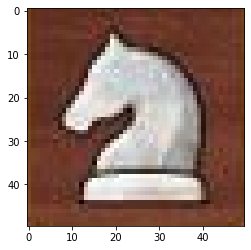

In [28]:
dataset = ChessPositionsDataset('data/processed/train_1', None)
print(len(dataset))
ind = 2**12+1
print(dataset[ind][1])
# print(dataset[ind][0])

plt.imshow(dataset[ind][0]/255,)
plt.show()


/home/sandor/dtu/2021-22-january/mlops/chess_positions_recognition/notebooks
